In [51]:
# Importing libraries
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib
import seaborn as sns                # Seaborn

# Package to implement Decision Tree Model
import sklearn
from sklearn.tree import DecisionTreeClassifier

# Package for data partitioning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import VotingClassifier 

# Package to visualize Decision Tree
from sklearn import tree

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

# Module to save and load Python objects to and from files
import pickle 

%matplotlib inline

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']


# Install scikit-learn if necessary
# !pip install -U scikit-learn

# Import necessary AdaBoost and VotingClassifier
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Import necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import pickle

In [52]:
# Load dataset as dataframe
health_df = pd.read_csv('fetal_health.csv')
health_df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [53]:
# Dropping null values
health_df.dropna(inplace = True)
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

### Decision Tree

In [54]:
# Select input and output features
X = health_df.drop(columns = ['fetal_health'])
y = health_df['fetal_health'].map({1: 'Normal', 2: 'Suspect', 3: 'Pathological'})
#used stack overflow+gpt for the.map
X_encoded = pd.get_dummies(X)
X_encoded.head()


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


In [55]:
# Split the encoded data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X_encoded, y, test_size = 0.2, random_state = 1) 

dt_model = DecisionTreeClassifier(random_state=0)


In [56]:
# Train models
dt_model.fit(train_X, train_y)

DecisionTreeClassifier(random_state=0)

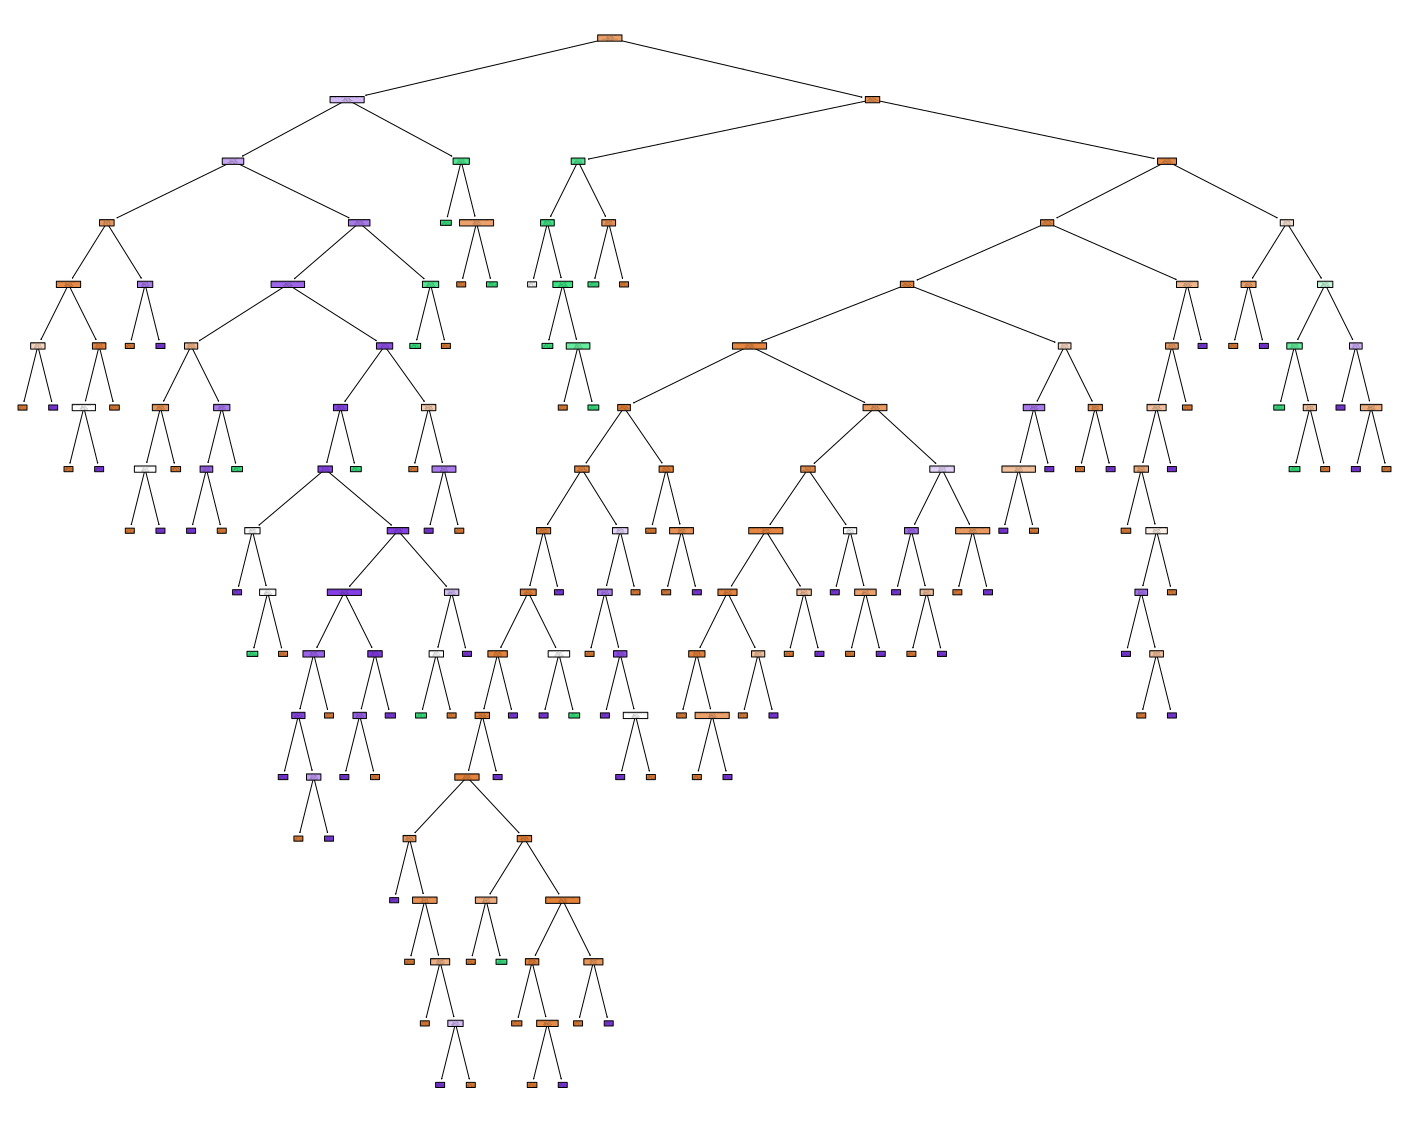

In [57]:
# Visualizing the trained decision tree model
fig = plt.figure(figsize=(25, 20))
tree.plot_tree(decision_tree=dt_model,
               max_depth=None,
               feature_names=train_X.columns,
               class_names=dt_model.classes_.astype(str),
               filled=True)

# Save the visualization to a file
fig.savefig("dt.svg", bbox_inches='tight')
plt.show()

In [58]:
# Decision Tree predictions
dt_y_pred = dt_model.predict(test_X)

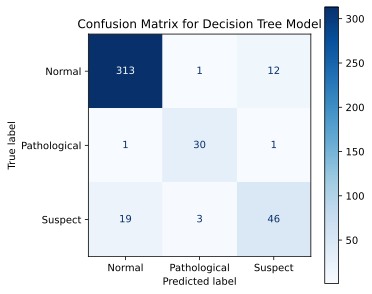

In [59]:
# Display confusion matrix and classification report
cm = confusion_matrix(test_y, dt_y_pred, labels=dt_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)

fig, ax = plt.subplots(figsize=(5, 5))
disp.plot(cmap='Blues', ax=ax)
plt.title('Confusion Matrix for Decision Tree Model')

# Save the visualization to a file
fig.savefig("dt_cf_matrix.svg", bbox_inches='tight')
plt.show()

In [60]:
# Generate the classification report as a DataFrame
report = classification_report(test_y, dt_y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Save the report as a CSV File
report_df.to_csv('dt_class_report.csv') 

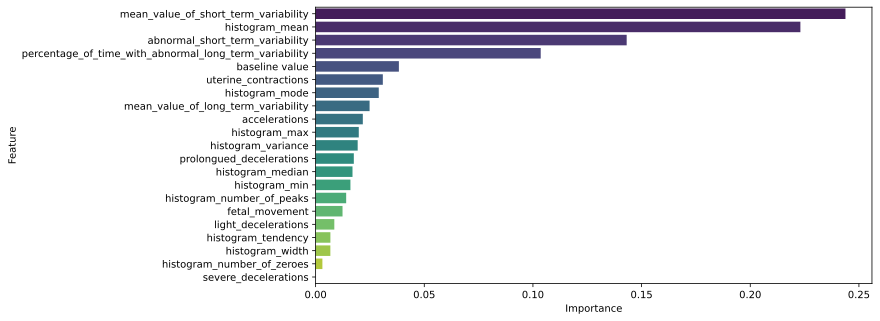

In [61]:
# Feature importance for Decison Tree
feature_imp = pd.DataFrame(list(zip(train_X.columns, dt_model.feature_importances_)),
                           columns=['Feature', 'Importance']).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_imp, palette='viridis')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Save the visualization to a file
fig.savefig("dt_ft_import.svg", bbox_inches='tight')
plt.show()

In [62]:
# Save models with Pickle
with open('decision_tree.pickle', 'wb') as dt_pickle:
    pickle.dump(dt_model, dt_pickle)


### Random Forest

In [63]:
# Data partitioning into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X_encoded, y, test_size = 0.2, random_state = 42)   

In [64]:
# Define your model
rf_model = RandomForestClassifier(random_state = 42)

In [65]:
# Fit the model
rf_model.fit(train_X, train_y)  

RandomForestClassifier(random_state=42)

In [66]:
# Random Forest predictions
rf_y_pred = rf_model.predict(test_X)
rf_y_proba = rf_model.predict_proba(test_X)

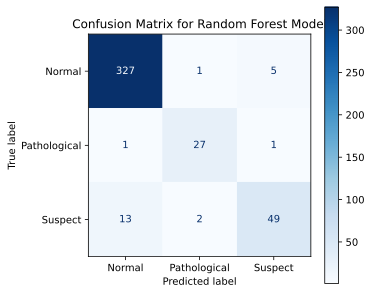

In [67]:
# Display confusion matrix for Random Forest
cm_rf = confusion_matrix(test_y, rf_y_pred, labels=rf_model.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
fig, ax = plt.subplots(figsize=(5, 5))
disp_rf.plot(cmap='Blues', ax=ax)
plt.title('Confusion Matrix for Random Forest Model')
fig.savefig("rf_cf_matrix.svg", bbox_inches='tight')
plt.show()

In [68]:
# Generate and save classification report as a CSV file
report_rf = classification_report(test_y, rf_y_pred, output_dict = True)
report_df = pd.DataFrame(report)
report_df.to_csv('rf_class_report.csv', index = True)
report_df.head()


,Normal,Pathological,Suspect,accuracy,macro avg,weighted avg
precision,0.939940,0.882353,0.779661,0.913146,0.867318,0.910030
recall,0.960123,0.937500,0.676471,0.913146,0.858031,0.913146
f1-score,0.949924,0.909091,0.724409,0.913146,0.861141,0.910859
support,326.000000,32.000000,68.000000,0.913146,426.000000,426.000000


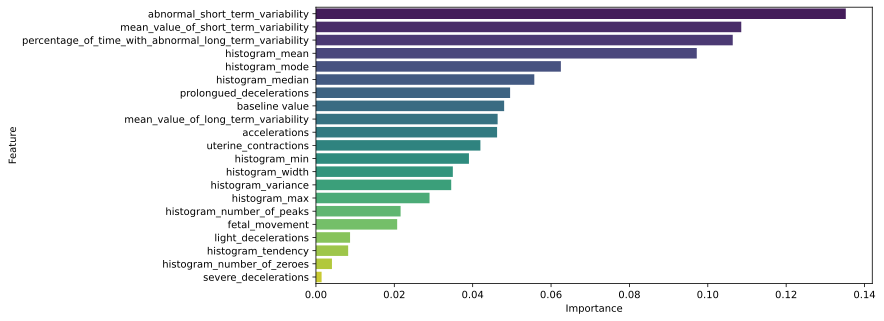

In [69]:
# Feature importance for Random Forest
importance = rf_model.feature_importances_

# Create a DataFrame for feature importance visualization
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
                           columns=['Feature', 'Importance']).sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_imp, palette='viridis')
plt.xlabel("Importance")
plt.ylabel("Feature")
fig.savefig("rf_ft_import.svg", bbox_inches='tight')
plt.show()

In [70]:
# Save the Random Forest model with Pickle
with open('random_forest.pickle', 'wb') as rf_pickle:
    pickle.dump(rf_model, rf_pickle) 

In [71]:
# AdaBoost Classifier
# Initialize AdaBoost model
ada_model = AdaBoostClassifier(random_state = 42)

In [72]:
# Train AdaBoost model
ada_model.fit(train_X, train_y)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=42)

In [73]:
# AdaBoost predictions
ada_y_pred = ada_model.predict(test_X)
ada_y_proba = ada_model.predict_proba(test_X)

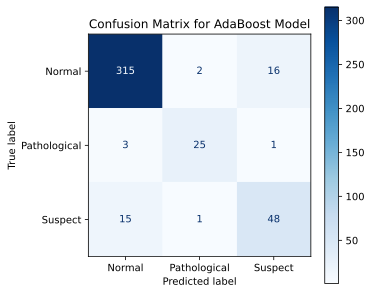

In [74]:
# Confusion Matrix for AdaBoost
cm_ada = confusion_matrix(test_y, ada_y_pred, labels=ada_model.classes_)
disp_ada = ConfusionMatrixDisplay(confusion_matrix=cm_ada, display_labels=ada_model.classes_)
fig, ax = plt.subplots(figsize=(5, 5))
disp_ada.plot(cmap='Blues', ax=ax)
plt.title('Confusion Matrix for AdaBoost Model')
fig.savefig("ada_cf_matrix.svg", bbox_inches='tight')
plt.show()

In [75]:
# Classification report for AdaBoost
report_ada = classification_report(test_y, ada_y_pred, output_dict = True)
report_ada = pd.DataFrame(report)
report_ada.to_csv('ada_class_report.csv', index = True)
report_ada.head()

,Normal,Pathological,Suspect,accuracy,macro avg,weighted avg
precision,0.939940,0.882353,0.779661,0.913146,0.867318,0.910030
recall,0.960123,0.937500,0.676471,0.913146,0.858031,0.913146
f1-score,0.949924,0.909091,0.724409,0.913146,0.861141,0.910859
support,326.000000,32.000000,68.000000,0.913146,426.000000,426.000000


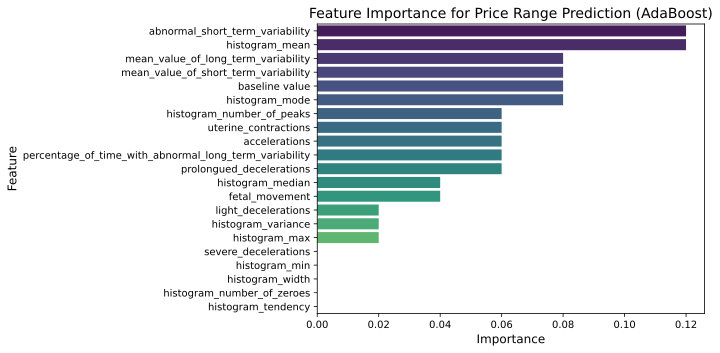

In [76]:
# Extract feature importance from the AdaBoost model
importance = ada_model.feature_importances_

# Storing feature importance as a DataFrame
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
                           columns=['Feature', 'Importance'])

# Sorting the feature importance DataFrame
feature_imp = feature_imp.sort_values('Importance', ascending=False).reset_index(drop=True)

# Plotting feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_imp, palette='viridis')
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title('Feature Importance for Price Range Prediction (AdaBoost)', fontsize=14)
plt.tight_layout()  # Ensures the plot fits well within the figure
plt.savefig("ada_ft_import.svg", bbox_inches='tight')  # Save the plot as an SVG
plt.show()


In [77]:
# Save the AdaBoost model with Pickle
with open('ada_boost.pickle', 'wb') as ada_pickle:
    pickle.dump(ada_model, ada_pickle)

### Soft Voting

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [79]:
# Load models from pickle files
with open('ada_boost.pickle', 'rb') as ada_file:
    ada_clf = pickle.load(ada_file)

with open('random_forest.pickle', 'rb') as rf_file:
    rf_clf = pickle.load(rf_file)

with open('decision_tree.pickle', 'rb') as dt_file:
    dt_clf = pickle.load(dt_file)

In [80]:
# Soft Voting Classifier
voting_model = VotingClassifier(
    estimators=[('rf', rf_clf), ('dt', dt_clf), ('ada', ada_clf)],
    voting='soft'
)

In [81]:
voting_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=0)),
                             ('ada', AdaBoostClassifier(random_state=42))],
                 voting='soft')

In [82]:
# Voting Classifier predictions
y_pred = voting_model.predict(X_test)

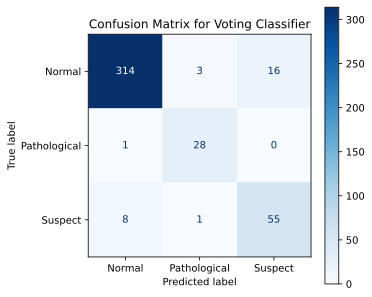

In [83]:
# Confusion Matrix for Voting Classifier
cm_voting = confusion_matrix(y_test, y_pred, labels=voting_model.classes_)
disp_voting = ConfusionMatrixDisplay(confusion_matrix=cm_voting, display_labels=voting_model.classes_)
fig, ax = plt.subplots(figsize=(5, 5))
disp_voting.plot(cmap='Blues', ax=ax)
plt.title('Confusion Matrix for Voting Classifier')
fig.savefig("voting_cf_matrix.svg", bbox_inches='tight')
plt.show()

In [84]:
# Classification report for Voting Classifier
report_voting = classification_report(y_test, y_pred, output_dict=True)
report_voting_df = pd.DataFrame(report_voting)
report_voting_df.to_csv('voting_class_report.csv', index=True)
report_voting_df.head()

,Normal,Pathological,Suspect,accuracy,macro avg,weighted avg
precision,0.972136,0.875000,0.774648,0.931925,0.873928,0.935854
recall,0.942943,0.965517,0.859375,0.931925,0.922612,0.931925
f1-score,0.957317,0.918033,0.814815,0.931925,0.896722,0.933234
support,333.000000,29.000000,64.000000,0.931925,426.000000,426.000000


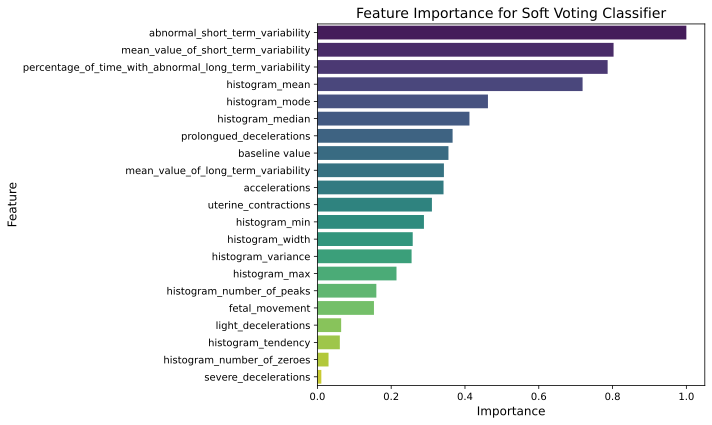

In [85]:
# Extract feature importance from each model in the Soft Voting Classifier
importance_rf = rf_clf.feature_importances_
importance_dt = dt_clf.feature_importances_
importance_ada = ada_clf.feature_importances_

# Storing feature importance as DataFrames
feature_imp_rf = pd.DataFrame(list(zip(X.columns, importance_rf)),
                              columns=['Feature', 'Importance'])
feature_imp_dt = pd.DataFrame(list(zip(X.columns, importance_dt)),
                              columns=['Feature', 'Importance'])
feature_imp_ada = pd.DataFrame(list(zip(X.columns, importance_ada)),
                               columns=['Feature', 'Importance'])

# Combine feature importances into one DataFrame
feature_imp_combined = pd.DataFrame({
    'Feature': X.columns,
    'Random Forest': importance_rf,
    'Decision Tree': importance_dt,
    'AdaBoost': importance_ada
})

# Normalize by dividing by the maximum importance (optional, for better comparison)
feature_imp_combined['Random Forest'] /= feature_imp_combined['Random Forest'].max()
feature_imp_combined['Decision Tree'] /= feature_imp_combined['Decision Tree'].max()
feature_imp_combined['AdaBoost'] /= feature_imp_combined['AdaBoost'].max()

# Sorting the feature importance DataFrame
feature_imp_combined = feature_imp_combined.set_index('Feature').sort_values(by='Random Forest', ascending=False)

# Plotting feature importance for the Soft Voting Classifier
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp_combined['Random Forest'], y=feature_imp_combined.index, palette='viridis')
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title('Feature Importance for Soft Voting Classifier', fontsize=14)
plt.tight_layout()
plt.savefig("voting_ft_import.svg", bbox_inches='tight')
plt.show()

#Used chat gpt to generate this

In [87]:
# Save the Voting Classifier model with Pickle
with open('soft_voting.pickle', 'wb') as voting_pickle:
    pickle.dump(voting_model, voting_pickle)